<a target="_blank" href="https://colab.research.google.com/github/suzhc/Diffusion-with-Colabs/blob/main/stable-diffusion/StableDiffusion.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Install require modules

In [1]:
!pip install diffusers["torch"] transformers --quiet
!pip install accelerate --quiet
!pip install git+https://github.com/huggingface/diffusers --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Mount the google drive (So you can save the model to your google drive)

In [4]:
import os
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Set the paths for source and target directories
src_dir = "/content/drive/MyDrive/huggingface_cache"
dst_dir = "/root/.cache/huggingface"

# Step 3: Check if the source directory exists
if not os.path.exists(src_dir):
    # Create the target directory if it doesn't exist
    os.makedirs(src_dir)
    print(f"Created directory: {src_dir}")
else:
    print(f"Directory already exists: {src_dir}")

# Step 4: Create the soft link
if not os.path.exists(dst_dir):
    os.symlink(src_dir, dst_dir)
    print(f"Created soft link from {src_dir} to {dst_dir}")
else:
    print("You already set it up, please check your /root/.cache/huggingface dir")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory already exists: /content/drive/MyDrive/huggingface_cache
You already set it up, please check your /root/.cache/huggingface dir


Load the pipeline

In [5]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Write your prompt on the below and GENERATE!

  0%|          | 0/50 [00:00<?, ?it/s]

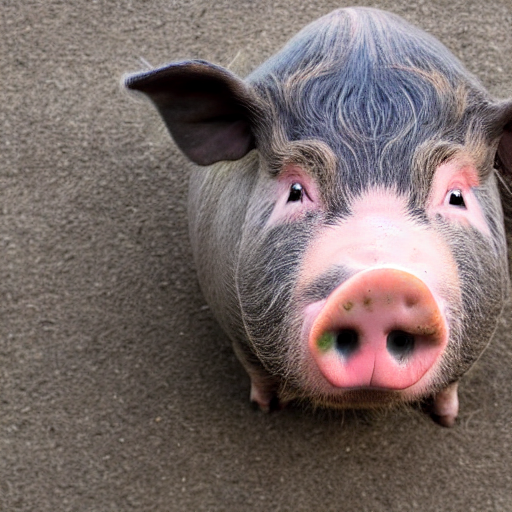

In [6]:
prompt = "a photo of a BIG head pig"
image = pipe(prompt).images[0]

image